<a href="https://colab.research.google.com/github/AdarshKumar420/Retail-Sales-Prediction/blob/main/ADARSH_KUMAR_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

# **Problem Description**
# **Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**
# **You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
%matplotlib inline

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing rossman dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction - ADARSH KUMAR/DATA/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#importing store dataset
store_df=pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction - ADARSH KUMAR/DATA/store.csv')

# **Rossman Dataset**

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**It tells the info of rosmann dataset. As it is telling us there are no null values here and also the datatype**

In [ ]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


**This tells us we have a data of almost 3 years.**

In [ ]:
#coverting the object datatype into int
rossman_df['SchoolHoliday'].astype(int)
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#total no.of instances with zero sale
len(rossman_df[rossman_df['Sales']==0])

172871

In [ ]:
#droping the instances which have zero sales or no sale
rossman_df = rossman_df[rossman_df['Sales'] != 0]
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Open           844338 non-null  int64 
 6   Promo          844338 non-null  int64 
 7   StateHoliday   844338 non-null  object
 8   SchoolHoliday  844338 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 64.4+ MB


In [ ]:
#droping the open attribute as it became redundant now
rossman_df.drop(['Open'], axis=1,inplace=True)

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


Text(0, 0.5, 'Counts')

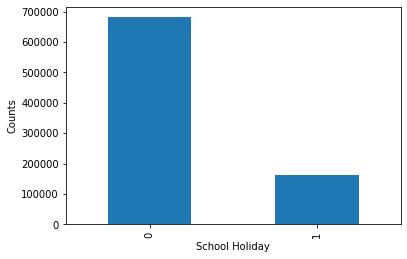

In [ ]:
#counting total no. of instances when school is opened and closed
rossman_df['SchoolHoliday'].value_counts().plot(kind='bar')
plt.xlabel('School Holiday')
plt.ylabel('Counts')

**This graph shows that approx. 20% times school is closed and most of the time it is opened.So it can be dropped.**

Text(0, 0.5, 'Counts')

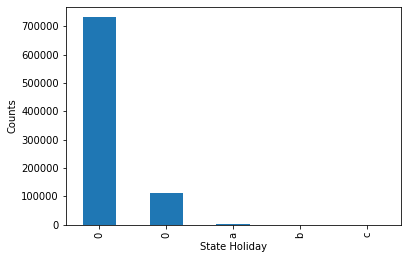

In [ ]:
# counting the different unique values in StateHoliday attribute
rossman_df['StateHoliday'].value_counts().plot(kind='bar')
plt.xlabel('State Holiday')
plt.ylabel('Counts')

**From graph we can say that most of the times, alomost 100% times stateholiday is not there. So it can be dropped**

In [ ]:
# from above graph we can say that stateholiday can be dropped
rossman_df.drop(['StateHoliday'] ,axis=1 ,inplace=True)
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1
1,2,5,2015-07-31,6064,625,1,1
2,3,5,2015-07-31,8314,821,1,1
3,4,5,2015-07-31,13995,1498,1,1
4,5,5,2015-07-31,4822,559,1,1


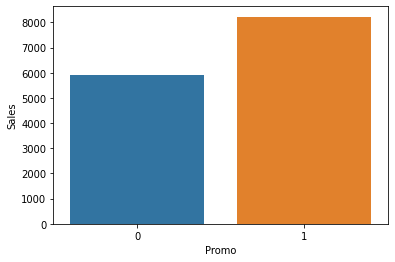

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

**From above barplot we can visualize that promo serves in increment of sales**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


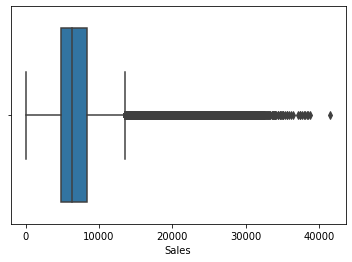

In [ ]:
#checking outliers in sales
sns.boxplot(rossman_df['Sales'])

**Box plot shows that we have a very high outliers in sales**

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
Rossman_df= remove_outlier(rossman_df, 'Sales')

**After revoming outliers , storing the rossman_df dataset into new variable named as Rossman_df**

In [ ]:
Rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813569 entries, 0 to 1017190
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          813569 non-null  int64 
 1   DayOfWeek      813569 non-null  int64 
 2   Date           813569 non-null  object
 3   Sales          813569 non-null  int64 
 4   Customers      813569 non-null  int64 
 5   Promo          813569 non-null  int64 
 6   SchoolHoliday  813569 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 49.7+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


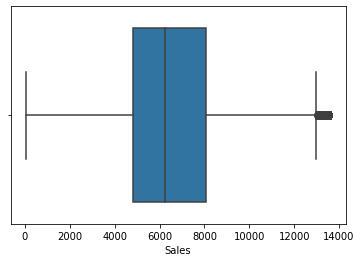

In [ ]:
# plot after outliers are removed
sns.boxplot(Rossman_df['Sales'])

**From above plot it can be seen that outliers are removed**



In [ ]:
#seperating the year, month and day column and droping date column
Rossman_df['Day'] = pd.DatetimeIndex(Rossman_df['Date']).day
Rossman_df['Month'] = pd.DatetimeIndex(Rossman_df['Date']).month
Rossman_df['Year'] = pd.DatetimeIndex(Rossman_df['Date']).year

Rossman_df.drop(['Date'] ,axis=1 ,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# info after cleaning dataset
Rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813569 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store          813569 non-null  int64
 1   DayOfWeek      813569 non-null  int64
 2   Sales          813569 non-null  int64
 3   Customers      813569 non-null  int64
 4   Promo          813569 non-null  int64
 5   SchoolHoliday  813569 non-null  int64
 6   Day            813569 non-null  int64
 7   Month          813569 non-null  int64
 8   Year           813569 non-null  int64
dtypes: int64(9)
memory usage: 62.1 MB


**So we have cleaned the rossman dataset, Rossman_df**

# **Store Dataset**

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# info of store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#summing up the null values in different attributes
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#filling up the null value with 0
store_df.fillna(0)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
# droping various attributes with very high null values 
store_df.drop(['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'] ,axis=1 ,inplace=True)

**As these attributes have very high null values count so we are dropping these features**

In [ ]:
# Create dummy variables for the catgeorical variable State
store_df['StoreType_a'] = np.where(store_df['StoreType']=='a', 1, 0)
store_df['StoreType_b'] = np.where(store_df['StoreType']=='b', 1, 0)
store_df['StoreType_c'] = np.where(store_df['StoreType']=='c', 1, 0)
store_df['StoreType_d'] = np.where(store_df['StoreType']=='d', 1, 0)

# Drop the original column State from the dataframe
store_df.drop(columns=['StoreType'],axis=1,inplace=True)

store_df['Assortment_a'] = np.where(store_df['Assortment']=='a', 1, 0)
store_df['Assortment_b'] = np.where(store_df['Assortment']=='b', 1, 0)
store_df['Assortment_c'] = np.where(store_df['Assortment']=='c', 1, 0)
store_df.drop(columns=['Assortment'],axis=1,inplace=True)


**Created the dummy variable for StoreType and Assortment attributes as it was containing object datatype.
  And then dropped down these both features**

In [ ]:
#info after cleaning the store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Store         1115 non-null   int64
 1   Promo2        1115 non-null   int64
 2   StoreType_a   1115 non-null   int64
 3   StoreType_b   1115 non-null   int64
 4   StoreType_c   1115 non-null   int64
 5   StoreType_d   1115 non-null   int64
 6   Assortment_a  1115 non-null   int64
 7   Assortment_b  1115 non-null   int64
 8   Assortment_c  1115 non-null   int64
dtypes: int64(9)
memory usage: 78.5 KB


# **Combined Data**

In [ ]:
# Merging both Datasets
combined_df = pd.merge(Rossman_df,store_df, on = 'Store', how = 'left')

In [ ]:
combined_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Day,Month,Year,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,31,7,2015,0,0,0,1,0,1,0,0
1,2,5,6064,625,1,1,31,7,2015,1,1,0,0,0,1,0,0
2,3,5,8314,821,1,1,31,7,2015,1,1,0,0,0,1,0,0
3,5,5,4822,559,1,1,31,7,2015,0,1,0,0,0,1,0,0
4,6,5,5651,589,1,1,31,7,2015,0,1,0,0,0,1,0,0


In [ ]:
#onfo of combined dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813569 entries, 0 to 813568
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store          813569 non-null  int64
 1   DayOfWeek      813569 non-null  int64
 2   Sales          813569 non-null  int64
 3   Customers      813569 non-null  int64
 4   Promo          813569 non-null  int64
 5   SchoolHoliday  813569 non-null  int64
 6   Day            813569 non-null  int64
 7   Month          813569 non-null  int64
 8   Year           813569 non-null  int64
 9   Promo2         813569 non-null  int64
 10  StoreType_a    813569 non-null  int64
 11  StoreType_b    813569 non-null  int64
 12  StoreType_c    813569 non-null  int64
 13  StoreType_d    813569 non-null  int64
 14  Assortment_a   813569 non-null  int64
 15  Assortment_b   813569 non-null  int64
 16  Assortment_c   813569 non-null  int64
dtypes: int64(17)
memory usage: 111.7 MB


**As from above info we can say that the final dataset that is combined_df is totally cleaned with no null values and of same datatype**

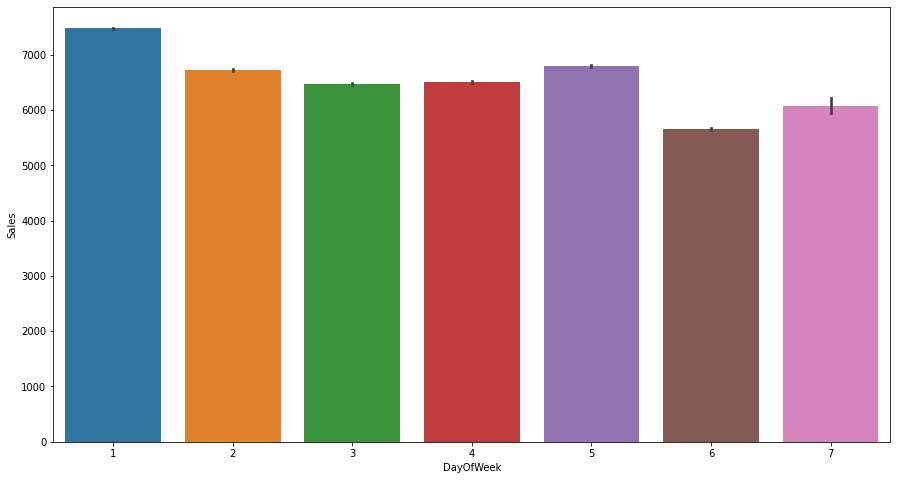

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=combined_df); 

**From plot it can be sen that most of the sales have been on 1st and last day of week**

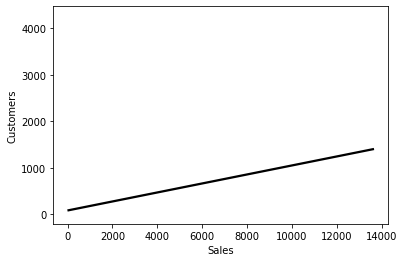

In [ ]:
#comparision of customer vs sales via linear line
sns.regplot(x='Sales',y='Customers' , data=combined_df, color='k', scatter_kws={'alpha':0.0})

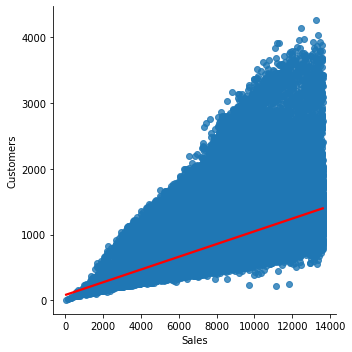

In [ ]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=combined_df, palette='seismic', height=5,aspect=1, line_kws={'color':'red'});

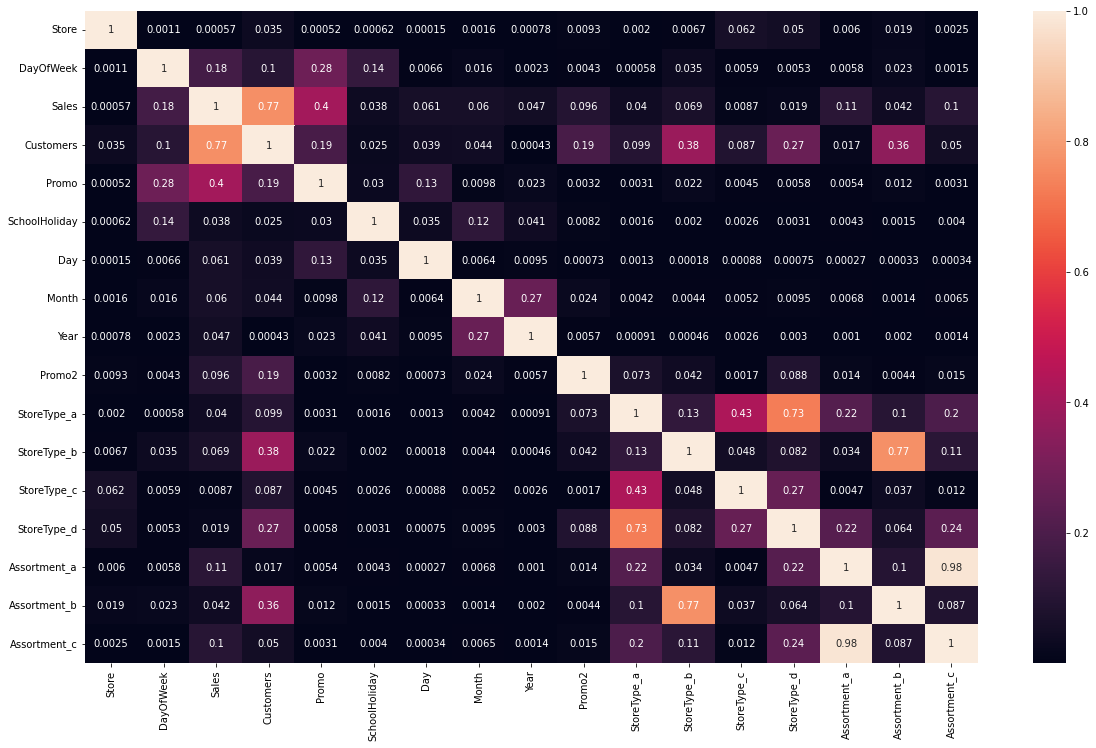

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(combined_df.corr().abs(), annot=True)

**So our combined data is cleaned and summarized via heatmap and now its time to implement different models**

# **Models Implementation** 

In [ ]:
combined_df.head()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Day,Month,Year,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,31,7,2015,0,0,0,1,0,1,0,0
1,2,5,6064,625,1,1,31,7,2015,1,1,0,0,0,1,0,0
2,3,5,8314,821,1,1,31,7,2015,1,1,0,0,0,1,0,0
3,5,5,4822,559,1,1,31,7,2015,0,1,0,0,0,1,0,0
4,6,5,5651,589,1,1,31,7,2015,0,1,0,0,0,1,0,0


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# **Linear Regression**

In [ ]:
#dependent variable
dependent_variable = 'Sales'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(combined_df.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['Assortment_b',
 'StoreType_b',
 'Assortment_a',
 'Month',
 'DayOfWeek',
 'Promo',
 'Assortment_c',
 'SchoolHoliday',
 'Store',
 'StoreType_d',
 'StoreType_c',
 'Customers',
 'Year',
 'Day',
 'StoreType_a',
 'Promo2']

In [ ]:
# Create the data of independent variables
X = combined_df[independent_variables].values

# Create the dependent variable data
y = combined_df[dependent_variable].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train[0:5]

array([[   0,    0,    0,    1,    4,    0,    1,    0,  373,    1,    0,
         250, 2014,   30,    0,    1],
       [   0,    0,    0,    2,    6,    0,    1,    0,  700,    0,    0,
         305, 2014,   22,    1,    1],
       [   0,    0,    1,    4,    4,    1,    0,    0,  615,    1,    0,
        1410, 2015,   30,    0,    0],
       [   0,    0,    0,   12,    6,    0,    1,    0,  765,    0,    0,
         822, 2013,   21,    1,    1],
       [   0,    0,    1,    7,    2,    1,    0,    0,  145,    0,    0,
        1341, 2015,   28,    1,    1]])

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:5]

array([[0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 1.        , 0.        , 0.33393178, 1.        ,
        0.        , 0.05862403, 0.5       , 0.96666667, 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , 0.09090909, 0.83333333,
        0.        , 1.        , 0.        , 0.62746858, 0.        ,
        0.        , 0.07194767, 0.5       , 0.7       , 1.        ,
        1.        ],
       [0.        , 0.        , 1.        , 0.27272727, 0.5       ,
        1.        , 0.        , 0.        , 0.55116697, 1.        ,
        0.        , 0.33963178, 1.        , 0.96666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.83333333,
        0.        , 1.        , 0.        , 0.68581688, 0.        ,
        0.        , 0.19718992, 0.        , 0.66666667, 1.        ,
        1.        ],
       [0.        , 0.        , 1.        , 0.54545455, 0.16666667,
        1.        , 0.        , 

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_

1350045966529400.8

In [ ]:
regressor.coef_

array([-4.04709561e+14, -9.45336406e+14, -4.04709561e+14,  3.19178345e+02,
       -1.17992188e+02,  1.08483203e+03, -4.04709561e+14,  3.33471680e+01,
       -1.41902344e+02, -9.45336406e+14, -9.45336406e+14,  2.93463750e+04,
        3.29918701e+02,  1.61643066e+01, -9.45336406e+14,  2.41215820e+02])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

array([ 3403,  2358, 11601, ...,  9524,  4397, 12190])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([ 3881.75,  5488.5 ,  5685.5 , ...,  5262.5 , 12256.  , 11524.5 ])

In [ ]:
y_test

array([ 2658,  4351,  5965, ...,  3634, 11901,  9368])

In [ ]:
mean_squared_error(y_test, y_pred)

1314710.7417252562

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

1146.9722851810286

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1146.6083645801893

In [ ]:
r2_score(y_train, y_pred_train)

0.7756763302319998

In [ ]:
r2_score(y_test, y_pred)

0.7754084179310325

**1.Its a good model with around 77% of accuracy**. 

  **2.This model has low bias and low variance which is very good for any model.**

**3.But it has some errors.**

**4.This model has good RMSE score a R-squared value of 0.77.**

# **Decision Tree**

In [ ]:
#importing libraries
import pandas as pd
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create an instance of the Decision Tree Regressor
DTRegressor_model = DecisionTreeRegressor(max_depth=17)


DTRegressor_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=17,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predictions Train and Test
DTRegressor_train_pred = DTRegressor_model.predict(X_train)
DTRegressor_test_pred = DTRegressor_model.predict(X_test)

In [ ]:
# MSE - Test 
mean_squared_error(y_test,DTRegressor_test_pred)

603755.0288821118

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_train, DTRegressor_train_pred))

643.8386285070465

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, DTRegressor_test_pred))

777.0167494218589

In [ ]:
# R-sqaured for Train
r2_score(y_train, DTRegressor_train_pred)

0.9293156428985251

In [ ]:
# R-sqaured for Test
r2_score(y_test, DTRegressor_test_pred)

0.8968607368790591

# **Conclusion**

**1.This decision tree model is very good to implement and has accuracy of around 90%.**

**2.It is quite good in terms of bias and variance.**

 **3.It is very less overfitted.**

 **4. And it has a very good MSE and RMSE score.**

 **5. R-Squared value of around 0.90.**




# **Recommended Model**

**Decision Tree Regressor model can be used as predicting the sales of the Rossman Stores.**

**1.As this model is best in terms of bias and variance**

**2.Its accuracy is very good.**

**3.It has very less error with very good RMSE score and also a very good R-squared value of 0.90.**